# **Linear Regression Analysis**

<span style="font-size:20px;">In this notebook, we will perform Exploratory Data Analysis (EDA) and build both Simple and Multiple Linear Regression model using the dataset provided</span>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [17]:
# Load the dataset
df = pd.read_csv('housing_prices.csv')

# Display the first few rows of the dataset 
df.head()

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,Price
0,6.243562,28,1,4,32.889897,-123.983562,411732.071058
1,14.310000,7,5,2,41.916961,-120.235850,897757.042908
2,11.247915,35,2,2,37.410029,-118.292385,668584.134344
3,9.381219,28,5,2,41.848457,-119.212951,615027.685530
4,3.184261,14,5,2,41.389964,-115.379239,335409.882746


 ## **Exploratory data Analysis**

In [39]:
# Display basic information about the dataset
df.info()

# Summary statistics of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     1000 non-null   float64
 1   HouseAge   1000 non-null   int64  
 2   AveRooms   1000 non-null   int64  
 3   AveOccup   1000 non-null   int64  
 4   Latitude   1000 non-null   float64
 5   Longitude  1000 non-null   float64
 6   Price      1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.863592,25.449000,3.905000,2.544000,36.791774,-119.013924,529262.106479
std,4.089923,14.137371,1.996988,1.115934,2.929064,2.860613,207931.304881
min,1.064848,1.000000,1.000000,1.000000,32.001865,-123.983562,131974.164256
25%,4.303626,13.000000,2.000000,2.000000,34.227420,-121.453737,347677.009382
50%,7.955303,25.000000,4.000000,3.000000,36.639405,-118.977631,524122.854299
75%,11.420474,38.000000,6.000000,4.000000,39.344085,-116.537145,704953.245763
max,14.996047,49.000000,7.000000,4.000000,41.976228,-114.009505,958112.384800


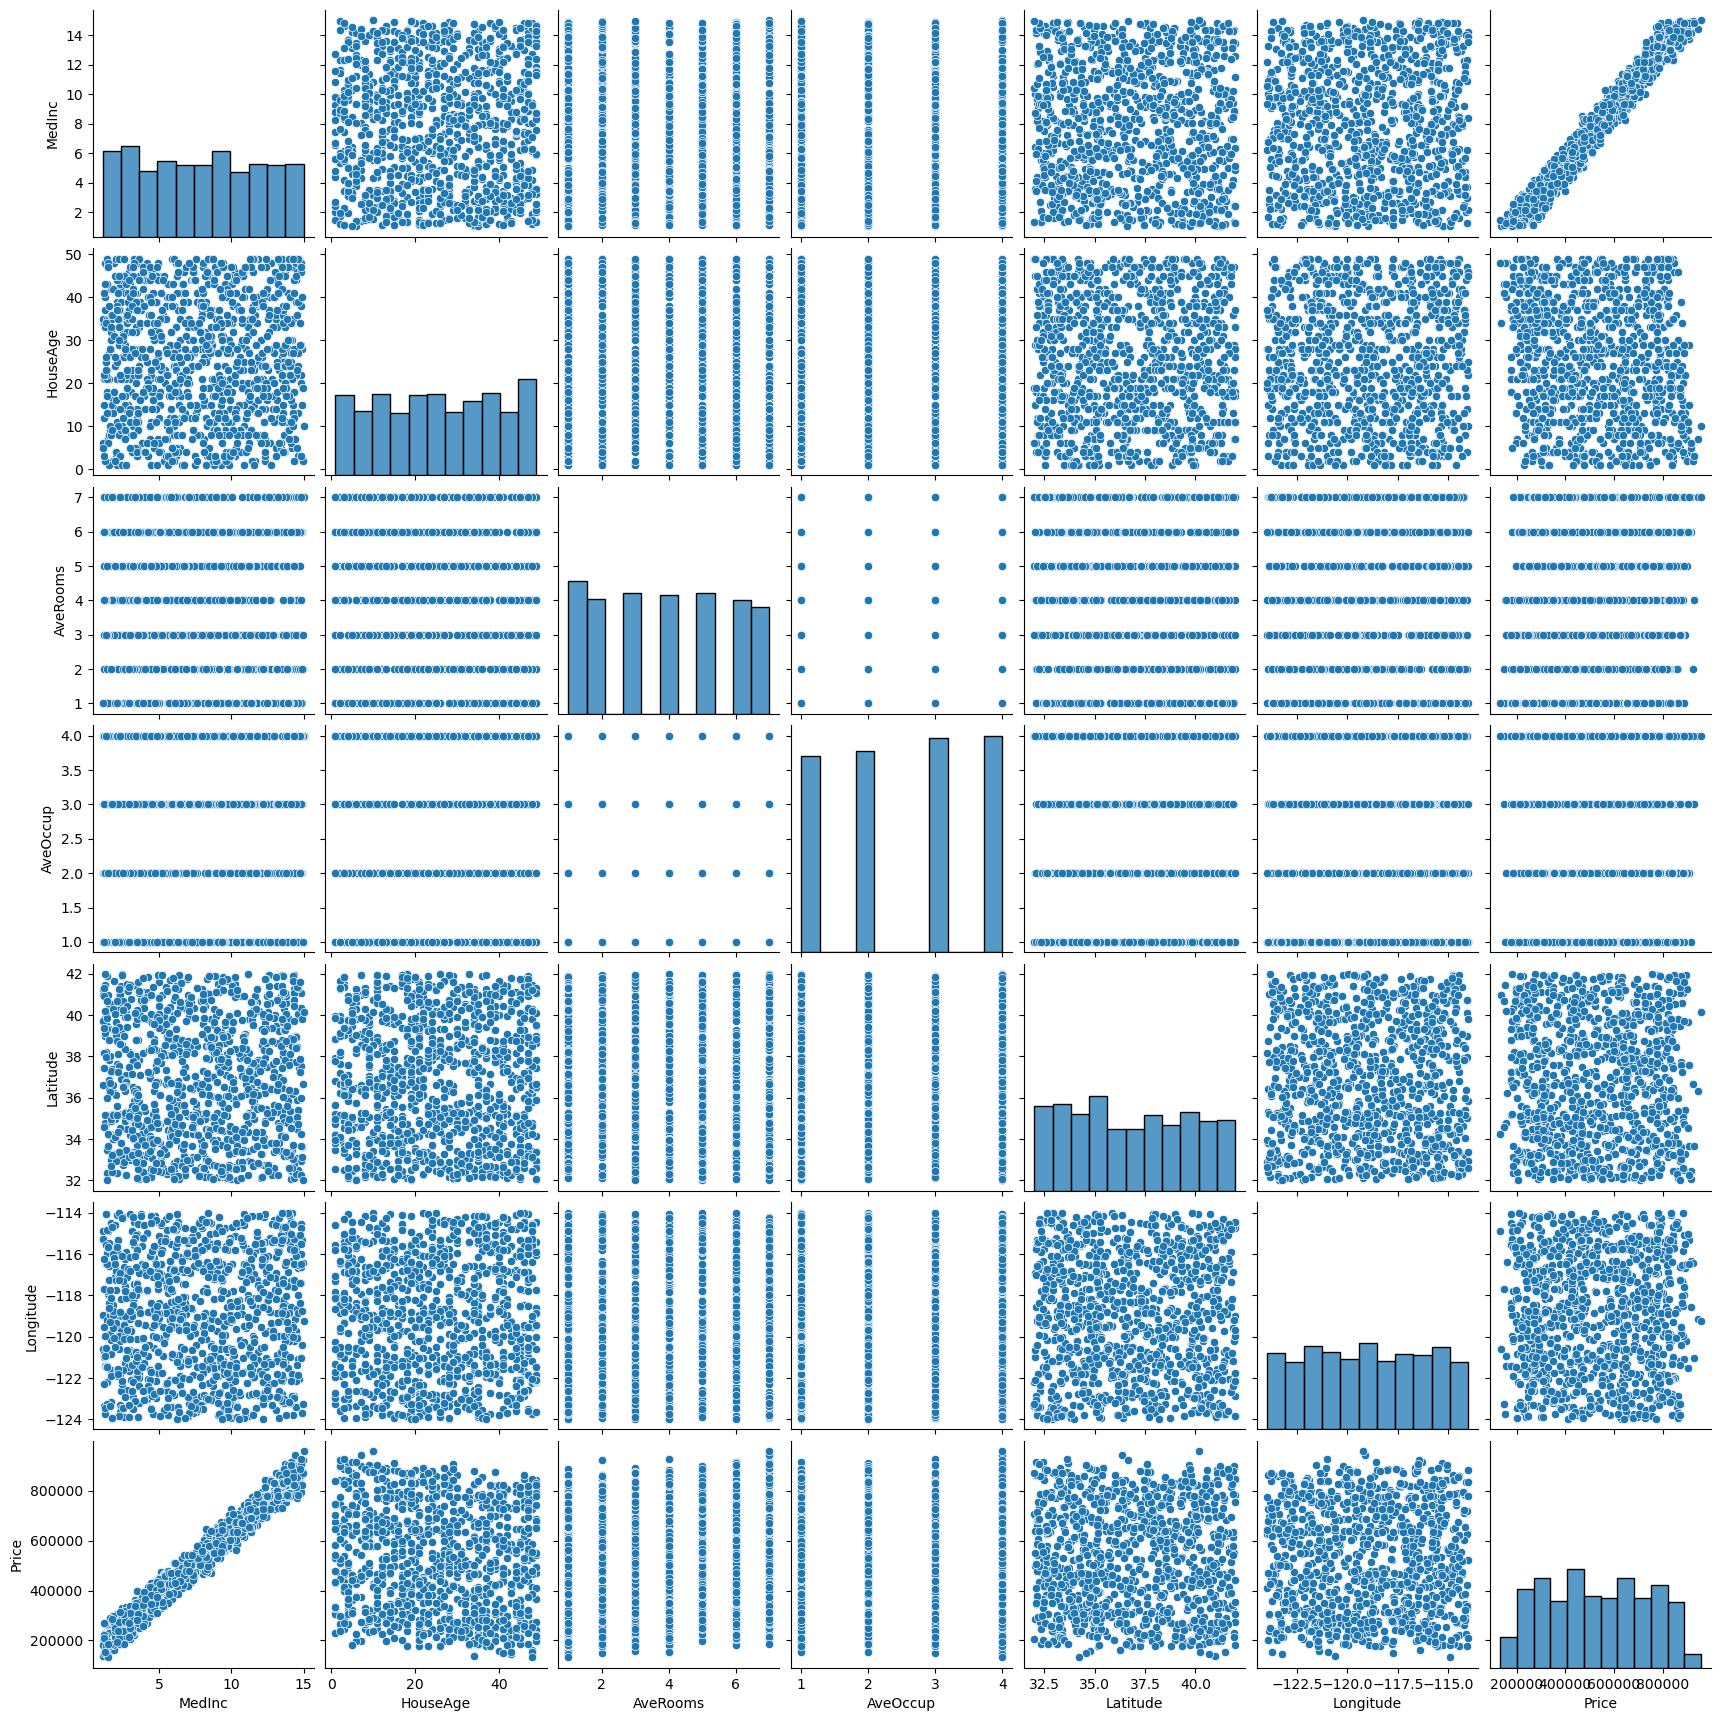

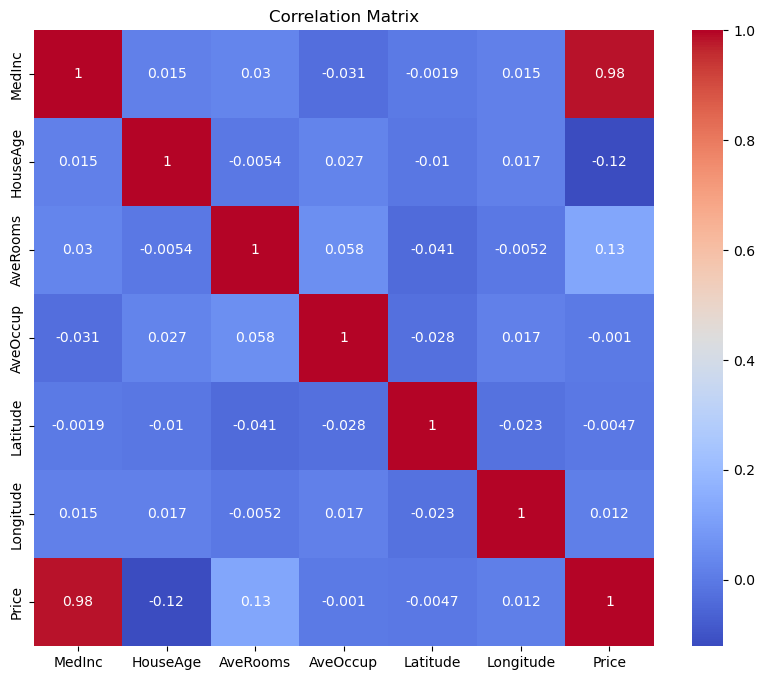

In [43]:
# Pairplot the vizualize relationships between variables
sns.pairplot(df)
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

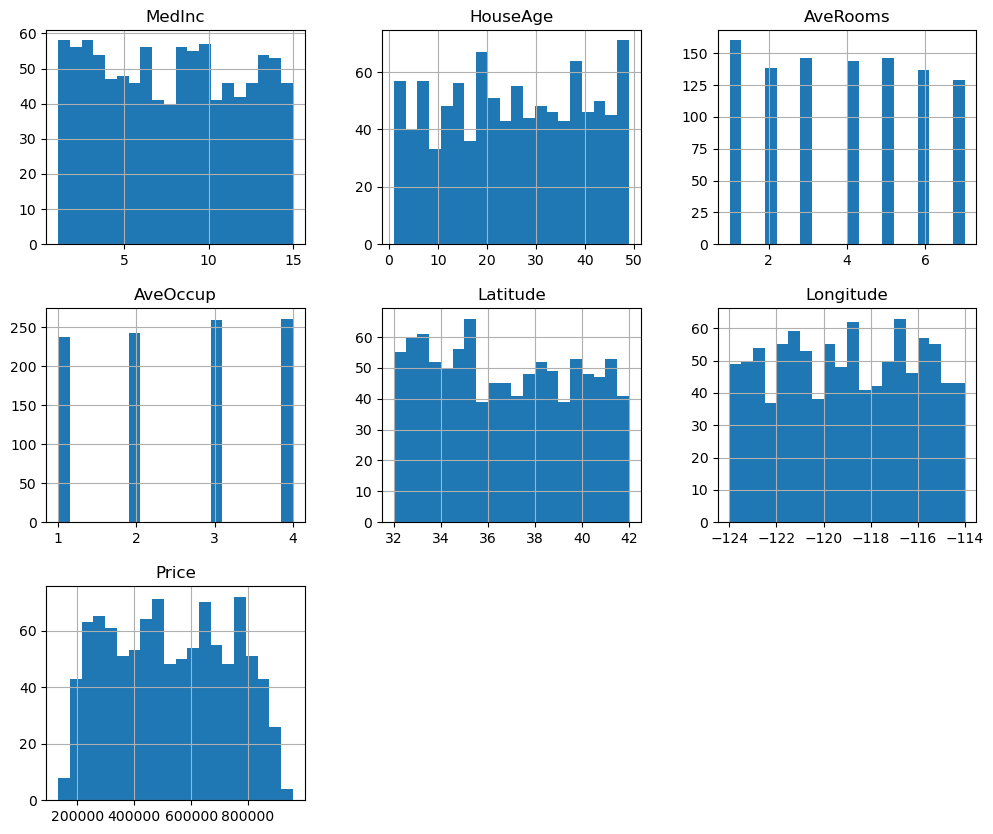

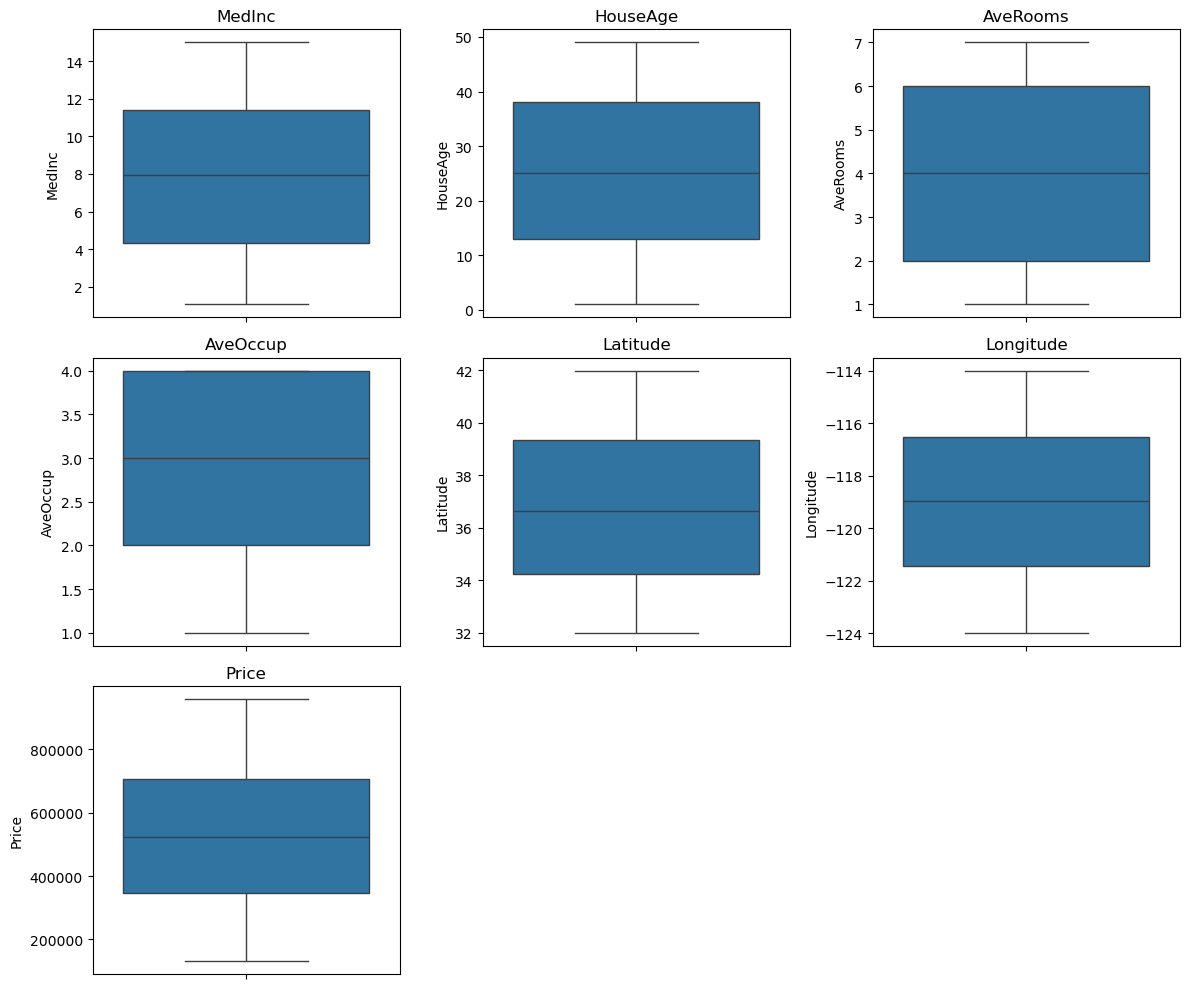

In [48]:
# Histograms of individual features 
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

## **Simple Linear Regression**

In [52]:
# Define the target variable and the predictor variable
x = df[['MedInc']]     # Predictor
y = df['Price']        # Target

In [54]:
# Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
# Create and train the model

simple_model = LinearRegression()
simple_model.fit(x_train, y_train)

LinearRegression()

Mean Squared Error: 1263941704.7718856
R^2 Score: 0.9697256501433821


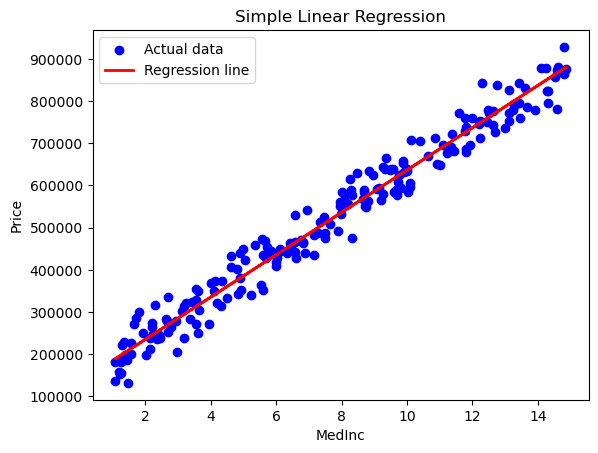

In [58]:
# Predictions
y_pred = simple_model.predict(x_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

# Plot the reression line
plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [62]:
# Asuming the model has already been trained and the relevant libraries have been imported 

# Input MedInc value from the user 
medinc_value = float(input("Enter the MedInc value: "))

# Convert the input to a 2D array for the model
medinc_value_array = np.array([[medinc_value]])

# Predict the house price using the trained model
predicted_price = simple_model.predict(medinc_value_array)

# Output the prediction
print(f"The predicted house price for MedInc value of {medinc_value} is: ${predicted_price[0]:.2f}")


Enter the MedInc value:  8.7


The predicted house price for MedInc value of 8.7 is: $571213.25


## **Multiple Linear Rzigression**

In [65]:
# Define multiple predictors
x_multi = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude']]
y_multi = df['Price']

In [67]:
# Split the dataset into training and testing sets

x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi, y_multi,
                                                                            test_size=0.2, random_state=42)

In [69]:
# Create and train the model

multi_model = LinearRegression()
multi_model.fit(x_train_multi, y_train_multi)

LinearRegression()

In [71]:
# Predictions 
y_pred_multi = multi_model.predict(x_test_multi)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi)}')
print(f'R^2 Score: {r2_score(y_test_multi, y_pred_multi)}')

Mean Squared Error: 79007060.87282704
R^2 Score: 0.9981075967404377


In [75]:
# Display the coefficients of the model
coefficients = pd.DataFrame(multi_model.coef_, x_multi.columns, columns=['Coefficient'])
print(coefficients)

            Coefficient
MedInc     50075.207588
HouseAge   -2009.671901
AveRooms    9877.309566
AveOccup    5423.349716
Latitude      89.780530
Longitude    -19.889667


<span style="font-size:20px;">In this notebook, we performed exploratory data analysis, built both simple and multiple linear regression models, snd evaluated their performance.</span>